In [4]:
import pandas as pd
import numpy as np
import duckdb
from xgboost import XGBRegressor
import warnings
from tqdm.notebook import tqdm

modelling_conn = duckdb.connect('modelling_db')
modelling_conn.execute("SET memory_limit = '16GB'")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# MODELOS

In [1]:
from modelling_utils.preprocessing import get_abt_estacoes_vizinhas
from training_utils import train_model
import duckdb
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

modelling_conn = duckdb.connect('modelling_db')
abt_estacoes_vizinhas = get_abt_estacoes_vizinhas(modelling_conn=modelling_conn,abt_estacoes_vizinhas_table_name='abt_estacoes_3_vizinhas')

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

## Modelo 1

In [2]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=1,
    usar_n_estacoes_vizinhas=0,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=False,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 1
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 0
🔄 Tipo de modelo: Modelo único

=== TREINAMENTO MODELO ÚNICO ===
📈 Preparando dados de treino e teste...
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros

📋 Resumo final:
   • Features de treino: (12734467, 39)
   • Features de teste: (5460499, 39)
   • Target treino - valores únicos: 267671
   • Target teste - valores únicos: 121575
🎯 Treinando modelo...
   • Features utilizadas: 37
   • Amostras de treino: 12734467
✅ Treinamento concluído!
🔮 Gerando predições...
⚖️  Truncando 665124 predições negativas para 0
📊 Predições geradas: 5460499
   • Valor mín: 0.000
   • Valor máx: 139.553
   • Média: 3.736
📋 Computando métricas de comparação...
✅ Comparação concluída!
💾 Salvando modelo e comparação...
✅ Arquivos salvos:
   • Model

## Modelo 2

In [3]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=2,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=False,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 2
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 1
🔄 Tipo de modelo: Modelo único

=== TREINAMENTO MODELO ÚNICO ===
📈 Preparando dados de treino e teste...
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros

📋 Resumo final:
   • Features de treino: (12734467, 44)
   • Features de teste: (5460499, 44)
   • Target treino - valores únicos: 267671
   • Target teste - valores únicos: 121575
🎯 Treinando modelo...
   • Features utilizadas: 42
   • Amostras de treino: 12734467
✅ Treinamento concluído!
🔮 Gerando predições...
⚖️  Truncando 735819 predições negativas para 0
📊 Predições geradas: 5460499
   • Valor mín: 0.000
   • Valor máx: 155.405
   • Média: 3.730
📋 Computando métricas de comparação...
✅ Comparação concluída!
💾 Salvando modelo e comparação...
✅ Arquivos salvos:
   • Modelo: models/model_2.pkl
   • Comparação: comparisons/comparison_2.pkl

🎉 Processo concluído com sucesso para modelo 2!


## Modelo 3

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=3,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=False,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 3
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 1
🔄 Tipo de modelo: Modelo único

=== TREINAMENTO MODELO ÚNICO ===
📈 Preparando dados de treino e teste...
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros
⚖️  Aplicando undersampling com ratio 1...
📉 Tamanho reduzido de 12734467 para 8206094 registros

📋 Resumo final:
   • Features de treino: (8206094, 44)
   • Features de teste: (5460499, 44)
   • Target treino - valores únicos: 175175
   • Target teste - valores únicos: 121575

📊 Estatísticas do target após processamento:
   • Treino - Média: 5.775, Mediana: 0.100
   • Teste  - Média: 3.716, Mediana: 0.000
   • Zeros no treino: 4,101,399 (50.0%)
   • Zeros no teste: 3,702,686 (67.8%)
🎯 Treinando modelo...
   • Features utilizadas: 42
   • Amostras de treino: 8206094


## Modelo 4

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=4,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 5

In [26]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=5,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 6

In [2]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=6,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=2,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 7

In [3]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=7,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=5,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 8

In [7]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=8,
    usar_n_estacoes_vizinhas=2,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 9

In [10]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=9,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 10

In [5]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=10,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 11

In [2]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=11,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.25,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 12

In [9]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=12,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.75,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 13

In [2]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=13,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.85,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 14

In [3]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=14,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.95,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 15

In [19]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=15,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=2,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.75,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 16

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=16,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=3,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.75,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

# COMPARAÇÕES

In [ ]:
from comparison_utils import plot_model_metrics,import_model_and_comparison,compute_metrics,plot_metrica_heatmap,plot_metric_by_bin
import pandas as pd

# Parâmetros de métricas
relative_error_threshold = 0.2
absolute_error_threshold = 10
min_sem_chuva = 1
min_relevancia = 0.5
beta = 1
minimo_muita_chuva = 20

## Métricas Gerais

In [23]:
# model_numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
model_numbers = [8,9,10,11,12,13,14,15,16]
models,comparisons,metrics = {},{},{}
for model_number in model_numbers:
    model_path,comparison_path = f'models/model_{model_number}.pkl',f'comparisons/comparison_{model_number}.pkl'
    models[model_number],comparisons[model_number] = import_model_and_comparison(model_path,comparison_path)
    if type(models[model_number]) == dict:
        comparisons[model_number] = pd.concat(comparisons[model_number].values())

    comparisons[model_number]['model'] = f'model_{model_number}'
    metrics[model_number] = compute_metrics(comparisons[model_number]['y_test'],comparisons[model_number]['y_pred'])
metrics_df = pd.DataFrame.from_dict(metrics,orient='index').reset_index(names=['model_number'])

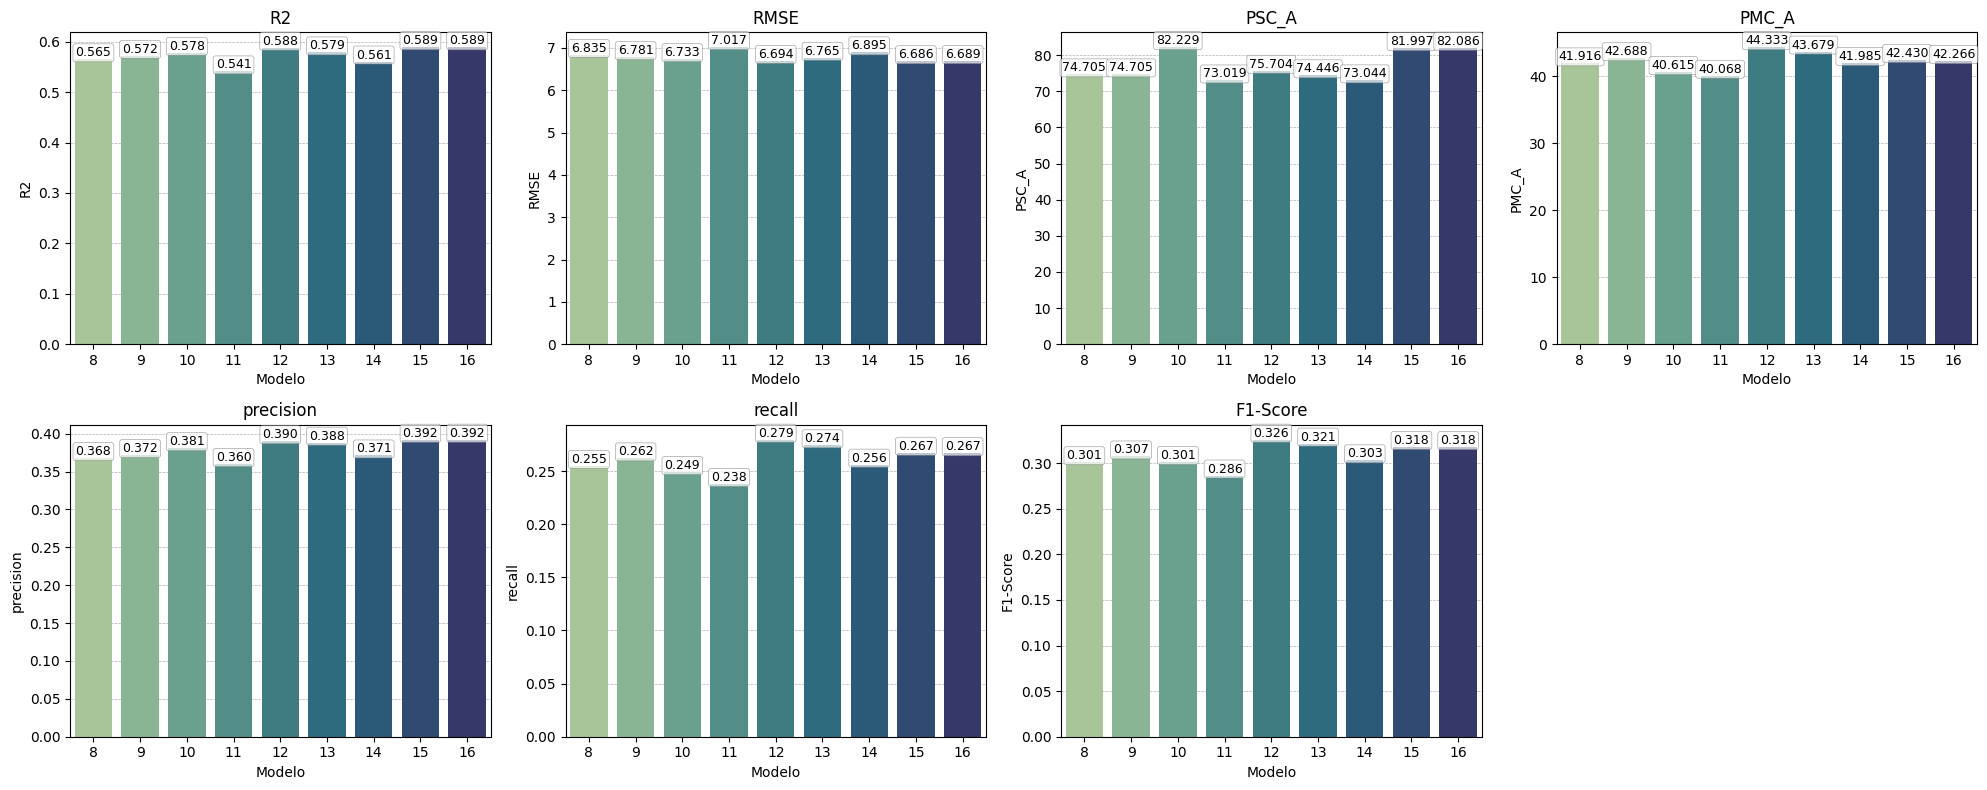

In [24]:
plot_model_metrics(metrics_df, ['R2', 'RMSE','PSC_A','PMC_A','precision','recall','F1-Score'])

## Análise por estações

In [7]:
estacoes = comparisons[1]['id_estacao'].unique()
dim_lat_lon = comparisons[1][['id_estacao','latitude','longitude']].drop_duplicates()

comparisons_estacoes = {
    model_number:{
        id_estacao:comparisons[model_number].loc[comparisons[model_number]['id_estacao']==id_estacao].copy() 
        for id_estacao in estacoes} 
    for model_number in comparisons.keys()}

metrics_estacoes = {
    model_number:{
        id_estacao:compute_metrics(comparisons_estacoes[model_number][id_estacao]['y_test'],comparisons_estacoes[model_number][id_estacao]['y_pred']) 
        for id_estacao in estacoes} 
    for model_number in comparisons.keys()}

dados = []
for model_number, estacoes_dict in metrics_estacoes.items():
    for id_estacao, metricas in estacoes_dict.items():
        linha = {"model_number": model_number, "id_estacao": id_estacao}
        linha.update(metricas)
        dados.append(linha)

df_metricas = pd.DataFrame(dados)
df_metricas = df_metricas.merge(dim_lat_lon,on='id_estacao',how='left')


C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Pa

c:\Users\Mateus Santos Rochas\Desktop\Estudos\07. Doutorado - Matemática aplicada\Pesquisa\Dados Novos\comparison_utils.py:121: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brasil_estados = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


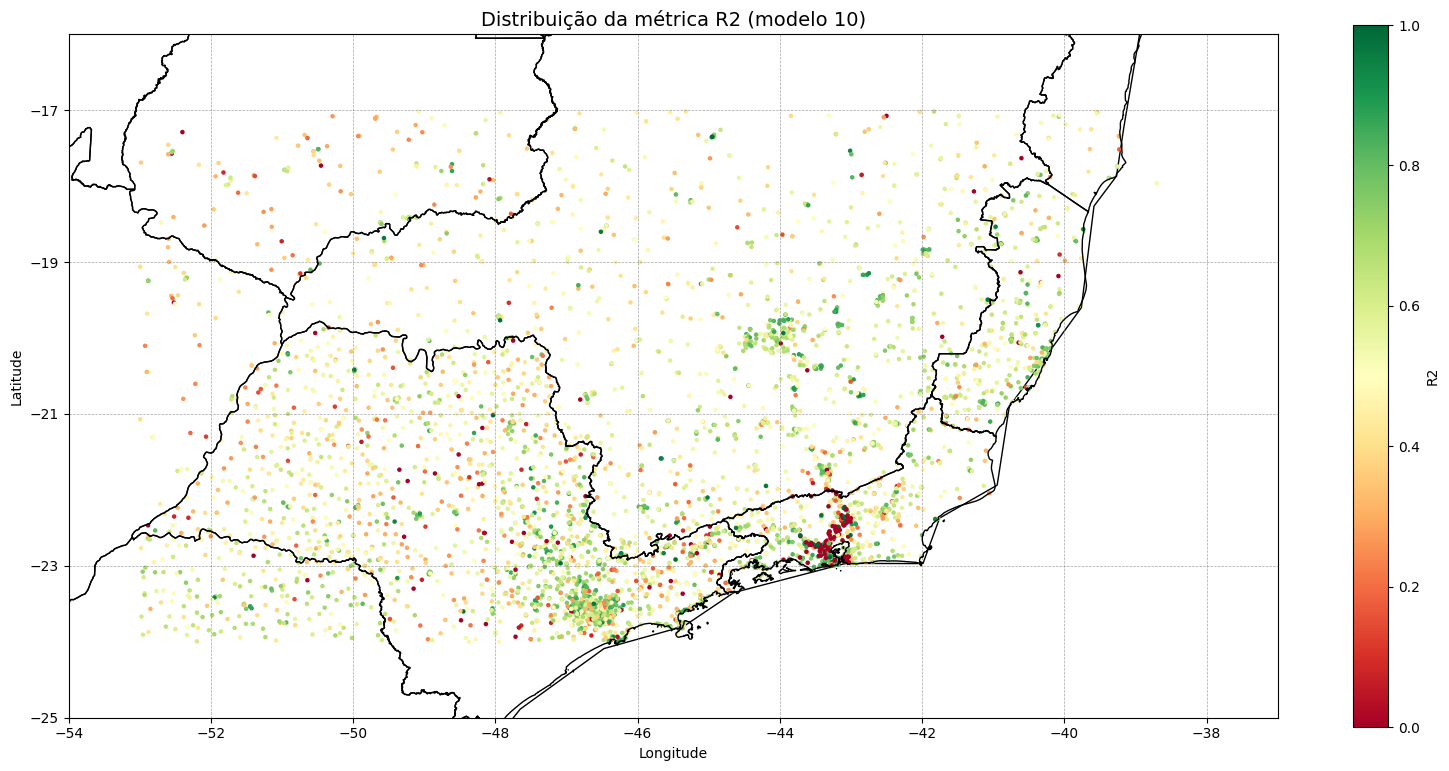

In [8]:
plot_metrica_heatmap(df_metricas, 'R2',model_number=10,figsize=(16,12),markersize=5)

# ANALISES INDIVIDUAIS

In [9]:
from comparison_utils import get_all_comparisons,get_metrics_per_station,plot_model_prediction_vs_observation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
model_numbers = [1,2,3,4,5,6,7,8,9,10]
comparison_df = get_all_comparisons(model_numbers)
count_medicoes_df = comparison_df.groupby(['model','id_estacao'],as_index=False).agg(count_medicoes=('y_test','count'))

metrics_per_station_df = get_metrics_per_station(comparison_df)
metrics_per_station_df = metrics_per_station_df.merge(count_medicoes_df,left_on=['model_number','id_estacao'],right_on=['model','id_estacao'],how='left')

C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Pa

In [11]:
model_number = 10
min_count_medicoes = 100
metric = 'R2'
ascending = False

metrics_per_station_df.loc[
    (metrics_per_station_df['model_number']==f'model_{model_number}')
    & (metrics_per_station_df['count_medicoes']>=min_count_medicoes)].sort_values(by=metric,ascending=ascending).head()

,model_number,id_estacao,precision,recall,F1-Score,RMSE,R2,MAE,PSC_A,PCC_A,PMC_A,latitude,longitude,model,count_medicoes
6370,model_10,920341,0.965171,0.967894,0.966530,1.044169,0.986951,0.419367,96.829971,99.472991,97.500000,-17.3500,-44.9500,model_10,3188
7119,model_10,925311,0.976553,0.936604,0.956161,1.631661,0.983262,0.664382,96.571429,98.888889,95.744681,-22.6500,-44.5833,model_10,530
6480,model_10,921795,0.982738,0.977561,0.980142,1.444058,0.980676,0.721560,92.009029,99.646955,98.837209,-19.7667,-47.9333,model_10,3348
4443,model_10,30,0.959847,0.977215,0.968453,1.591676,0.978199,0.703511,96.003996,99.805825,99.242424,-21.1700,-47.8000,model_10,1516
4469,model_10,65,0.943106,0.944624,0.943865,1.736223,0.975590,0.757007,96.032553,99.437148,97.810219,-21.1700,-47.8000,model_10,1516


In [12]:
model_number = 10
id_estacao = 925311
plot_model_prediction_vs_observation(comparison_df, model_number=model_number, id_estacao=id_estacao,figsize=(18, 6))

TypeError: plot_model_prediction_vs_observation() got an unexpected keyword argument 'figsize'

In [ ]:
comparisons[10].loc[comparisons[10]['id_estacao']==id_estacao].head()

,id_estacao,latitude,longitude,dt_medicao,y_test,y_pred,model
2848687,925311,-22.65,-44.5833,2002-04-11,0.0,0.0,model_10
2848688,925311,-22.65,-44.5833,2002-04-12,0.0,0.0,model_10
2848689,925311,-22.65,-44.5833,2002-04-13,0.0,0.0,model_10
2848690,925311,-22.65,-44.5833,2002-04-14,0.0,0.0,model_10
2848691,925311,-22.65,-44.5833,2002-04-15,0.0,0.0,model_10


In [ ]:
len(estacoes)

4420

In [ ]:
# Conferir se to validando no lugar correto
# >  Ex: estação 920341 ta com dados desde 2000, nao deveria
# > Testar mais limiares pro bi_model
# > Investigar estçaões do ES
# > Implementar o SmoteR
# > Correlação entre o indice da melhor estação e o R2